<a href="https://colab.research.google.com/github/MaxGhenis/taxcalc-notebooks/blob/master/zero_ltcg_bracket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zero long-term capital gains bracket

Several 

https://quarryhilladvisors.com/blog/can-capital-gains-push-me-into-a-higher-tax-bracket says:
>Starting in 2018 and until (at least) 2025, the long-term capital gains tax is 0% if the seller is roughly in the 12% ordinary income tax bracket (married couples with a combined salary of \$78,750 or single filers with an income of \$39,375).

This evaluates how tax liabilities change for single tax units with low ordinary income, depending on the amount of long-term capital gains realized.


## Setup

In [0]:
import sys
!pip install matplotlib-label-lines
if 'microdf' not in sys.modules:
    !pip install git+git://github.com/maxghenis/microdf.git
if 'taxcalc' not in sys.modules:
    !pip install git+git://github.com/PSLmodels/Tax-Calculator.git

In [0]:
import pandas as pd
import numpy as np
import microdf as mdf
import taxcalc as tc
import itertools

## Analysis

In [0]:
def cartesian_product(d):
    index = pd.MultiIndex.from_product(d.values(), names=d.keys())
    return pd.DataFrame(index=index).reset_index()

In [0]:
# Wages, salaries, and tips for taxpayer net of pension contributions
e00200p = np.arange(0, 50001, 10000)
# Net long-term capital gains/losses
p23250 = np.arange(0, 100001, 1000)

In [0]:
d = {'e00200p': e00200p, 
     'p23250': p23250}

In [0]:
data = cartesian_product(d)

In [0]:
data['RECID'] = data.index + 1
data['MARS'] = 1  # Single.
data['e00200'] = data.e00200p  # Asserts e00200 == e00200p + e00200s.

In [0]:
recs = tc.Records(data=data, start_year=2019)

In [0]:
df = mdf.calc_df(records=recs, group_vars=['e00200p', 'p23250'])

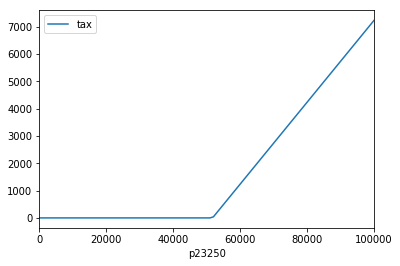

In [10]:
df[df.e00200p == 0][['p23250', 'tax']].set_index('p23250').plot()

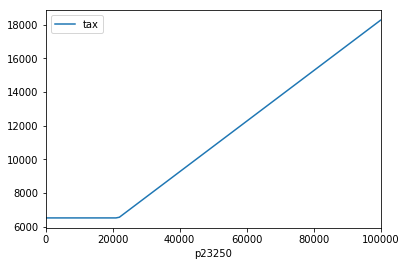

In [11]:
df[df.e00200p == 30000][['p23250', 'tax']].set_index('p23250').plot()

In [12]:
df[(df.e00200p == 30000) & df.p23250.isin([50e3, 51e3])][['p23250', 'tax']]

,p23250,tax
RECID,,
354,50000.0,10762.9608
355,51000.0,10912.9608


In [13]:
df[(df.e00200p == 0) & df.p23250.isin([80e3, 81e3])][['p23250', 'tax']]

,p23250,tax
RECID,,
81,80000.0,4239.984
82,81000.0,4389.984


In [14]:
df[(df.e00200p == 40000) & df.p23250.isin([290e3, 291e3])][['p23250', 'tax']]

,p23250,tax
RECID,,
